In [1]:
# 필요한 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print("x_train 배열의 크기:", len(x_train))  # x_train 배열의 크기 출력

2.4.1
11493376/11490434 [==============================] - 0s 0us/step
x_train 배열의 크기: 60000


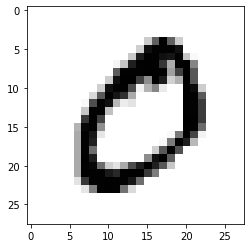

In [2]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [3]:
print(y_train[1])

0


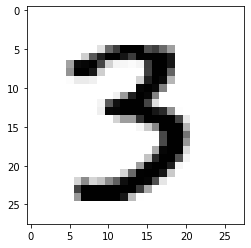

10001 번째 이미지의 숫자는 바로  3 입니다.


In [4]:
# index에 0에서 59999 사이의 숫자를 바꿔가면서 실험해 보세요. 
index=10000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [5]:
print(x_train.shape)

(60000, 28, 28)


In [6]:
 
print(x_test.shape)

(10000, 28, 28)


In [7]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [8]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [9]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [11]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [12]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4138 - accuracy: 0.8719
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0659 - accuracy: 0.9794
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0452 - accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0347 - accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0287 - accuracy: 0.9910
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0223 - accuracy: 0.9928
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0180 - accuracy: 0.9940
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0135 - accuracy: 0.9955
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0123 - accuracy: 0.9959
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.010

In [13]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0310 - accuracy: 0.9917
test_loss: 0.03098222427070141 
test_accuracy: 0.9916999936103821


In [14]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1.9959576e-14 2.6160818e-10 2.3287150e-09 4.8126452e-07 1.5232171e-09
 2.3498382e-12 1.7148797e-14 9.9999952e-01 1.6680584e-09 1.7306762e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


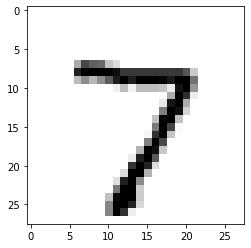

In [15]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [2.6093528e-06 9.7223341e-01 3.9860265e-06 7.2779689e-09 2.1632069e-03
 3.6997274e-03 1.7628334e-02 5.6716144e-05 4.2092307e-03 2.8362424e-06]
라벨: 6, 예측결과: 1


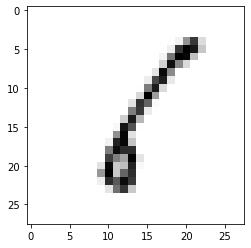

예측확률분포: [4.6454218e-07 3.1906092e-01 1.0554994e-02 6.3996113e-06 2.9703349e-02
 3.0804865e-04 6.3761491e-01 6.4908445e-06 2.7442491e-03 2.4847989e-07]
라벨: 1, 예측결과: 6


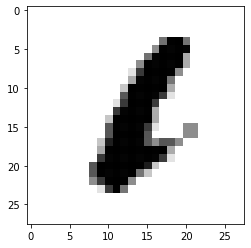

예측확률분포: [1.3961496e-04 2.1197599e-09 1.1343247e-02 1.5198992e-09 9.2123342e-01
 9.0074600e-06 6.6934846e-02 9.0438525e-06 1.4958998e-04 1.8113892e-04]
라벨: 6, 예측결과: 4


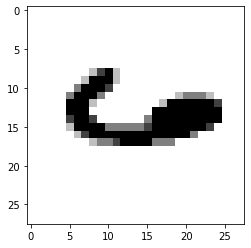

예측확률분포: [6.6308590e-09 9.2167556e-01 1.1004627e-04 4.7762296e-05 2.5268880e-04
 5.7313440e-07 9.1973940e-05 7.7795193e-02 2.2407889e-05 3.8100361e-06]
라벨: 7, 예측결과: 1


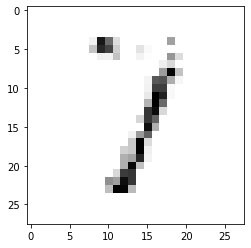

예측확률분포: [6.7119389e-19 6.5181114e-09 3.6822340e-11 9.9526703e-01 1.9310069e-09
 4.7317282e-03 2.1421180e-10 2.6472409e-11 2.0357895e-07 1.0637751e-06]
라벨: 5, 예측결과: 3


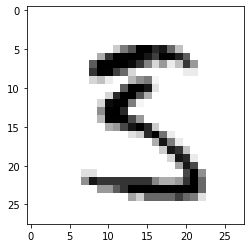

In [16]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [17]:

# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [18]:
# 모델 컴파일
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4552 - accuracy: 0.8606
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0685 - accuracy: 0.9794
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0480 - accuracy: 0.9848
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0361 - accuracy: 0.9888
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0281 - accuracy: 0.9909
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0208 - accuracy: 0.9936
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0206 - accuracy: 0.9932
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0133 - accuracy: 0.9957
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0113 - accuracy: 0.9965
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.009